In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls /content/drive/MyDrive/Infosys-springboard-internship/content/Processed

label_map.json	X.npy  y.npy


In [8]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Infosys-springboard-internship/instrunet_model_v1.h5')

# Display the model summary to confirm it's loaded correctly
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,778 (28.20 MB)

 Trainable params: 7,392,776 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
# To continue training, you can simply call model.fit() again.
# For example, let's train for another 5 epochs.

print("Continuing training the loaded model for 5 more epochs...")

# It's good practice to recompile if you intend to make changes to optimizer or learning rate
# For simple continuation, it might not be strictly necessary, but good for clarity
loaded_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training
fine_tune_history = loaded_model.fit(
    X_train,
    y_train,
    epochs=5, # Number of additional epochs
    validation_data=(X_val, y_val)
)

print("Retraining complete.")

Continuing training the loaded model for 5 more epochs...
Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 122s 851ms/step - accuracy: 0.7461 - loss: 0.7878 - val_accuracy: 0.8946 - val_loss: 0.3785
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 112s 798ms/step - accuracy: 0.8385 - loss: 0.4913 - val_accuracy: 0.8946 - val_loss: 0.3589
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 141s 790ms/step - accuracy: 0.8381 - loss: 0.4471 - val_accuracy: 0.8929 - val_loss: 0.3452
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 143s 798ms/step - accuracy: 0.8325 - loss: 0.4431 - val_accuracy: 0.9000 - val_loss: 0.3230
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 142s 800ms/step - accuracy: 0.8906 - loss: 0.3219 - val_accuracy: 0.9161 - val_loss: 0.3298
Retraining complete.


In [13]:
print("Evaluating the fine-tuned model on the test dataset...")
# Convert NumPy arrays to TensorFlow tensors explicitly to ensure known shapes
X_test_tensor = tf.convert_to_tensor(X_test_reshaped, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

test_loss, test_accuracy = loaded_model.evaluate(X_test_tensor, y_test_tensor, batch_size=32)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Evaluating the fine-tuned model on the test dataset...
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.8842 - loss: 0.3870
Test Loss: 0.3691
Test Accuracy: 0.8911


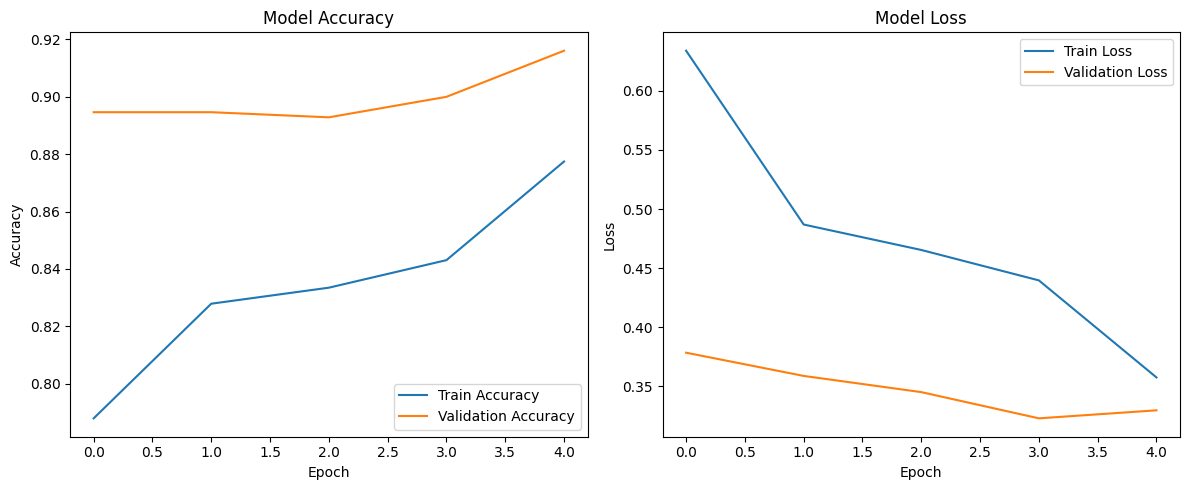

In [14]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(fine_tune_history.history['loss'], label='Train Loss')
plt.plot(fine_tune_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
plt.show()

## Generate Confusion Matrix

### Subtask:
Make predictions with the `loaded_model` on the test set, convert the predictions to class labels, and then generate and display a confusion matrix to visualize per-class performance.


**Reasoning**:
To generate the confusion matrix, I need to make predictions using the trained model on the test data, convert these predictions to class labels, and then use `sklearn.metrics.confusion_matrix` and `seaborn` to visualize it as a heatmap.



18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 455ms/step


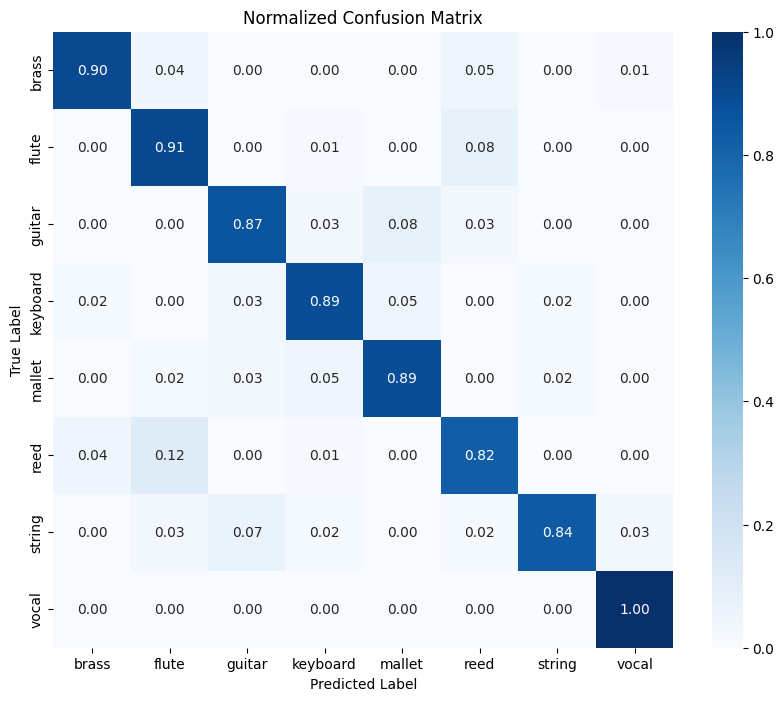

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get predictions from the loaded model on the test set
predictions = loaded_model.predict(X_test_tensor)

# 2. Convert predictions (probabilities) to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Ensure y_test is a numpy array for confusion_matrix
true_labels = y_test # y_test is already a numpy array from the kernel state

# 3. Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# 4. Normalize the confusion matrix (optional, but good for visualization)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define class names using the label_map for better readability
class_names = list(label_map.keys())

# 5. Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
